# Intro
The dataset has one csv file for each currency. Price history is available on a daily basis from April 28, 2013. This dataset has the historical price information of some of the top crypto currencies by market capitalization.

* Date : date of observation
* Open : Opening price on the given day
* High : Highest price on the given day
* Low : Lowest price on the given day
* Close : Closing price on the given day
* Volume : Volume of transactions on the given day
* Market Cap : Market capitalization in USD

# Objective
The main objective of this project is to produce a workable model that will be able to predict the price of crypto currencies.

# Workflow
1. Get the data ready
2. Pick a model to solve the problem
3. Split data into training and testing sets (Feature Engineering)
4. Fit the model to data and make prediction
5. save and reload trained data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Get the data ready

## Unzip Dataset

In [3]:
# Unzip the data
import zipfile
with zipfile.ZipFile("crypto data set/archive.zip","r") as zip_ref:
    zip_ref.extractall("crypto data set")

## Get All CSV's Into One Dataset

In [4]:
# get all CSV files in the unzipped file
import os

path = 'C:/Users/AC Nice/Documents/DATA SCIENCE PROJECT/main projects/Crypto Price Predictor/crypto data set'
try:
    file = os.listdir(path)
except FileNotFoundError:
    print('Path not found')
    
data = [pd.read_csv('crypto data set/'+i) for i in file[0:23]]
df = pd.concat(data)
df.to_csv('crypto data set/Exported_crypto_data.csv')

## Read CSV

In [5]:
main_df = pd.read_csv('crypto data set/Exported_crypto_data.csv', index_col=False, parse_dates=['Date'])
df = main_df.copy()

In [6]:
# check for missing values
df.isna().sum(), df.shape

(Unnamed: 0    0
 SNo           0
 Name          0
 Symbol        0
 Date          0
 High          0
 Low           0
 Open          0
 Close         0
 Volume        0
 Marketcap     0
 dtype: int64,
 (34115, 11))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34115 entries, 0 to 34114
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  34115 non-null  int64         
 1   SNo         34115 non-null  int64         
 2   Name        34115 non-null  object        
 3   Symbol      34115 non-null  object        
 4   Date        34115 non-null  datetime64[ns]
 5   High        34115 non-null  float64       
 6   Low         34115 non-null  float64       
 7   Open        34115 non-null  float64       
 8   Close       34115 non-null  float64       
 9   Volume      34115 non-null  float64       
 10  Marketcap   34115 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 2.9+ MB


In [8]:
# Drop the name column since we have the symbol column
df.drop(['Unnamed: 0','SNo','Name'], axis=1, inplace=True)
df.columns

Index(['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')

# Feature Engineering

## Sort the Datetime Object

In [9]:
# Sort the dates colums in ascending order
df.sort_values(by=['Date'], ascending=True, inplace=True)
df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
15698,LTC,2013-04-29 23:59:59,4.573600,4.225640,4.36676,4.383900,0.0,7.538896e+07
1459,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.44400,144.539993,0.0,1.603769e+09
1460,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.00000,139.000000,0.0,1.542813e+09
15699,LTC,2013-04-30 23:59:59,4.572380,4.168960,4.40352,4.296490,0.0,7.402092e+07
15700,LTC,2013-05-01 23:59:59,4.356860,3.520290,4.28954,3.801010,0.0,6.560460e+07


## Create Year, Month, Day Columns from Date column

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

In [11]:
df.Symbol.value_counts()

LTC      2862
BTC      2862
XRP      2764
DOGE     2631
XMR      2473
XLM      2398
USDT     2189
XEM      2159
ETH      2031
MIOTA    1355
EOS      1337
BNB      1313
TRX      1263
LINK     1256
ADA      1245
USDC      873
CRO       806
WBTC      759
ATOM      716
SOL       323
DOT       191
UNI       163
AAVE      146
Name: Symbol, dtype: int64

## Convert Categorical Features to Numbers
The only categorical features here is the <code>Symbol</code>

In [12]:
# Change Object datatypes to categorical datatypes
for key, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[key] = content.astype('category').cat.as_ordered()
        df[key] = pd.Categorical(content).codes

Compare each symbol to its categorical code

In [13]:
# Create a dataframe of pointing each symbol to its code

def get_symbol_code(df):
    for key,content in df.drop('Name',axis=1).items():
        if pd.api.types.is_string_dtype(content):
            con = content.astype('category').cat.as_ordered()
            return con
con = get_symbol_code(main_df)

In [14]:
# Create a dataframe of pointing each symbol to its code
symbol_and_code = pd.DataFrame({'Codes':pd.Categorical(con).codes,'Symbol':con})
symbol_and_code = pd.DataFrame({'Codes':symbol_and_code.Codes.unique(),'Symbols': con.unique()})
symbol_and_code.sort_values(by=['Codes'], inplace=True)
symbol_and_code

,Codes,Symbols
0,0,AAVE
3,1,ADA
5,2,ATOM
1,3,BNB
2,4,BTC
6,5,CRO
7,6,DOGE
14,7,DOT
8,8,EOS
9,9,ETH


In [22]:
# Export Symbols and codes 
symbol_and_code.to_csv('crypto data set/Symbols_and_code.csv')

In [19]:
# Have a look at the coin that interests me :)
doge = df[df['Symbol'] == 6]
doge

,Symbol,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day
8344,6,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06,2013,12,16
8345,6,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06,2013,12,17
8346,6,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06,2013,12,18
8347,6,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07,2013,12,19
8348,6,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06,2013,12,20
...,...,...,...,...,...,...,...,...,...,...
10970,6,0.053768,0.042410,0.053698,0.047392,2.394345e+09,6.089686e+09,2021,2,23
10971,6,0.059873,0.046216,0.047414,0.056555,4.148512e+09,7.267918e+09,2021,2,24
10972,6,0.057808,0.049869,0.056615,0.050167,2.356982e+09,6.447665e+09,2021,2,25
10973,6,0.052472,0.048708,0.050138,0.050480,1.694323e+09,6.488523e+09,2021,2,26


In [20]:
# Split the data into features and labels
X = df.drop('Close', axis=1)
y = df['Close']

In [21]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((27292, 9), (27292,))

In [196]:
# Choosing an estimator (Model)
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Support Vector Regressor
linear = make_pipeline(StandardScaler(),
                       LinearSVR(random_state=0, max_iter=10000))
# RandomForestRegressor
reg = RandomForestRegressor()


linear.fit(X_train, y_train)
reg.fit(X_train, y_train)

RandomForestRegressor()

In [197]:
linear.score(X_test, y_test), reg.score(X_test, y_test)

(0.9990198534302881, 0.9994814850707424)

**Why isn't this metric reliable?**

In [198]:
# Build evaluation function to calculate the RMSLE (Root Mean Log Squared Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [199]:
def root_mean_log_squared_error(y_test, y_preds):
    """
        Calculates the root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def score (model):
    y_pred = model.predict(X_test)
    scores = {
        'RMSLE': root_mean_log_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred),
    }
    return scores

In [200]:
score(reg)

{'RMSLE': 0.017315420348499436,
 'MAE': 9.766406942970118,
 'R^2': 0.9994814850707424}

# Feature Importance

Which attributes were most important when predicting the target variable <code>**Close**</code>

In [201]:
len(reg.feature_importances_), len(X_train.columns)

(9, 9)

In [202]:
import seaborn as sns
def plot_features(cols, importance, n=20):
    df = pd.DataFrame({'Features': cols,'Feature_Importances': importance}).sort_values('Feature_Importances', ascending=False).reset_index(drop=True)
    
    # Visualize the Feature importance matrices
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.barh(df['Features'][:n], df['Feature_Importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

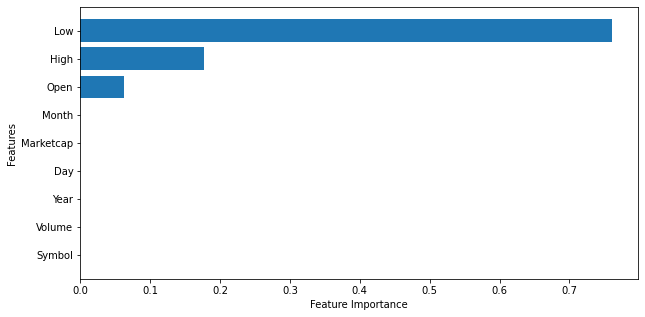

In [203]:
plot_features(X_train.columns, reg.feature_importances_)

In [205]:
# Export Model
import pickle
pickle.dump(reg, open('cryptopredictor.pkl','wb'))